In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy.external as sce
# import scrublet as scr
# import muon as mu
#from vpolo.alevin import parser # to parse alevin output
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.multitest as multi

import re

seed = 0
np.random.seed(seed)
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis', transparent=False, frameon=False)  # low dpi (dots per inch) yields small inline figures

import matplotlib as mpl
# 2 lines below solved the facecolor problem.
# mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
sc.settings.autosave = True
sc.logging.print_header()

version = '241113_scDRS'
# input_table = '../data/231009_PBMC_HH514.csv'

results_file = '../scanpy/{}/res.h5ad'.format(version)
results_file_mu = '../scanpy/{}/res.h5mu'.format(version)
results_file_cellxgene = '../scanpy/{}/res.cxg.h5ad'.format(version)

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)

sc.settings.figdir = '../scanpy/{}/graph'.format(version)
sc.settings.cachedir = '../scanpy/{}/cache'.format(version)
# %config InlineBackend.figure_format = 'retina'

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)
os.makedirs(sc.settings.figdir, exist_ok=True)

scanpy==1.10.4 anndata==0.11.1 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.0.3 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


In [3]:
adata = sc.read('/home/yy693/pi_hafler/ASAP/scanpy/241028_CSF_downstream/res.cxg.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 259560 × 24155
    obs: 'cellranger_sample_id', 'SampleID', 'SampleType', 'DonorID', 'Estimated Number of Cells', 'Mean Reads per Cell', 'Median Genes per Cell', 'Number of Reads', 'Valid Barcodes', 'Sequencing Saturation', 'Q30 Bases in Barcode', 'Q30 Bases in RNA Read', 'Q30 Bases in UMI', 'Reads Mapped to Genome', 'Reads Mapped Confidently to Genome', 'Reads Mapped Confidently to Intergenic Regions', 'Reads Mapped Confidently to Intronic Regions', 'Reads Mapped Confidently to Exonic Regions', 'Reads Mapped Confidently to Transcriptome', 'Reads Mapped Antisense to Gene', 'Fraction Reads in Cells', 'Total Genes Detected', 'Median UMI Counts per Cell', 'Q30 Bases in RNA Read 2', 'chemistry', 'Visit', 'SubjectID', 'DateICFSigned', 'YearICFSigned', 'EnrollmentCategory', 'RBDY/N?', 'YearofRBDDx', 'RBDAAO', 'AgeRBDDx', 'RBDDxtoConesnt', 'PDY/N', 'Year1stPDSx', 'YearofPDDx', 'PDAAO', 'AgePDDx', 'PDDxtoConsent', 'DLBY/N', 'Year1stDLBSx', 'YearDLBDX', 'DLB

In [5]:
dict_score = {
    trait: pd.read_csv(f"/home/yy693/pi_hafler/scDRS/output/241028_CSF_downstream/{trait}.full_score.gz", sep="\t", index_col=0)
    for trait in ["PD", "RBD", 'LBD']
}

for trait in dict_score:
    adata.obs[trait] = dict_score[trait]["norm_score"]

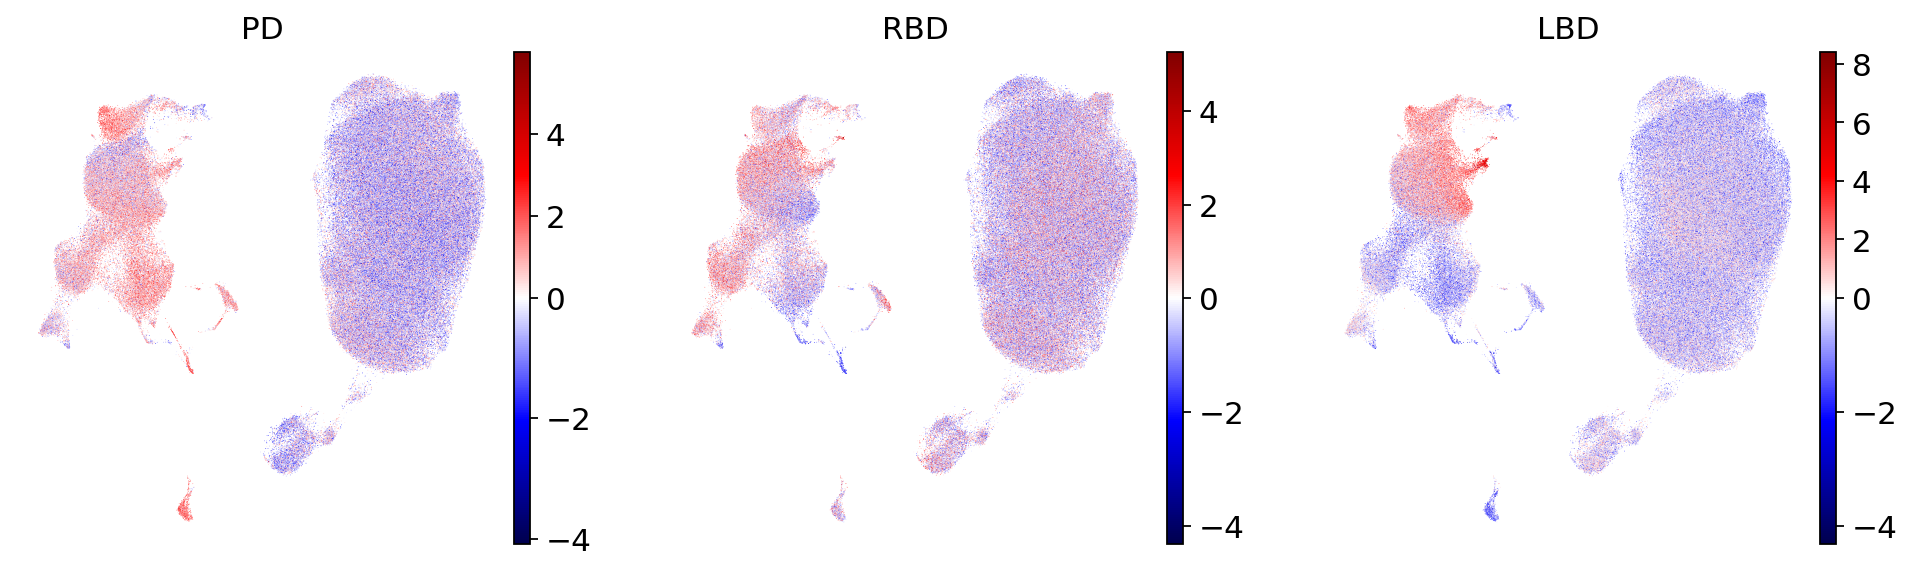

In [42]:
sc.pl.embedding(adata, basis="umap_filtered", color=["PD", "RBD", 'LBD'],
                     save='scDRS_CSF.pdf', cmap='seismic', vcenter=0, sort_order=False)

In [1]:
import scdrs

In [32]:
dict_df_stats[x][dict_df_stats[x]['n_cell'] > 500]

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
group,,,,,,,,,
B memory,1056.0,1000.0,0.955045,-1.558060,0.182817,0.816304,0.0,0.0,0.0
CD14 Mono,12200.0,1000.0,0.691309,-0.519792,0.051948,1.660650,6.0,30.0,30.0
CD4 Tcm,108083.0,1000.0,0.970030,-1.815541,0.013986,3.331785,11.0,118.0,118.0
CD4 Tem,16895.0,1000.0,0.995005,-2.648685,0.102897,1.219343,2.0,14.0,14.0
CD4 Tnaive,14610.0,1000.0,0.996004,-2.511812,0.026973,2.416420,0.0,10.0,10.0
CD8 Tem_emra,44823.0,1000.0,0.991009,-1.862615,0.063936,1.492142,4.0,47.0,47.0
CSF Mac,36510.0,1000.0,0.000999,4.920186,0.000999,5.531730,1074.0,3398.0,3398.0
Cycling Myeloid,838.0,1000.0,0.002997,3.484513,0.059940,1.847528,6.0,43.0,43.0
NK CD16,911.0,1000.0,0.730270,-0.614174,0.429570,0.146640,0.0,0.0,0.0


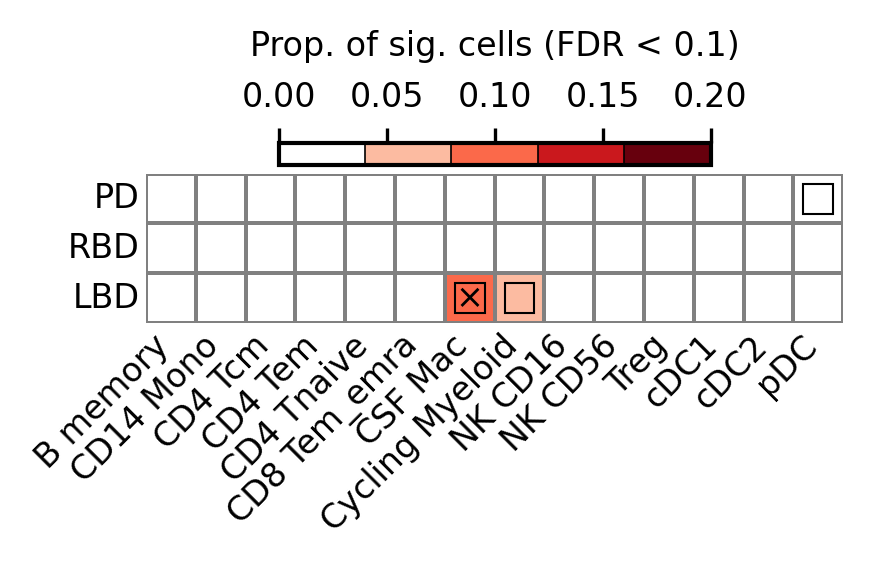

In [47]:
dict_df_stats = {
    trait: pd.read_csv(f"/home/yy693/pi_hafler/scDRS/output/241028_CSF_downstream/{trait}.scdrs_group.cluster_L2", sep="\t", index_col=0)
    for trait in ["PD", "RBD", 'LBD']
}

for x in dict_df_stats.keys():
    dict_df_stats[x]['n_fdr_0.1'] = dict_df_stats[x]['n_fdr_0.2']
    dict_df_stats[x] = dict_df_stats[x][dict_df_stats[x]['n_cell'] > 500]
# dict_celltype_display_name = {
#     "pyramidal_CA1": "Pyramidal CA1",
#     "oligodendrocytes": "Oligodendrocyte",
#     "pyramidal_SS": "Pyramidal SS",
#     "interneurons": "Interneuron",
#     "endothelial-mural": "Endothelial",
#     "astrocytes_ependymal": "Astrocyte",
#     "microglia": "Microglia",
# }

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats={
        trait: df_stats #.rename(index=dict_celltype_display_name)
        for trait, df_stats in dict_df_stats.items()
    },
    plot_kws={
        "vmax": 0.2,
        "cb_fraction":0.12
    },
        assoc_fdr_threshold=0.1,
    hetero_fdr_threshold=0.1,
)
ax.grid(False)
plt.savefig(f'../scanpy/{version}/scDRS_CSF_group.pdf', bbox_inches='tight')

In [14]:
dict_df_stats['PD']

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
group,,,,,,,,,
ASC,125.0,1000.0,0.063936,1.724298,0.197802,0.755437,0.0,0.0,0.0
B memory,1056.0,1000.0,0.068931,1.606438,0.571429,-0.297203,0.0,0.0,0.0
B naive,196.0,1000.0,0.104895,1.314648,0.448551,0.182745,0.0,0.0,0.0
CD14 Mono,12200.0,1000.0,0.072927,1.409509,0.230769,0.411754,0.0,0.0,0.0
CD16 Mono,239.0,1000.0,0.488511,0.016503,0.323676,0.409760,0.0,0.0,0.0
CD4 Tcm,108083.0,1000.0,0.983017,-2.064014,0.086913,1.365647,1.0,1.0,1.0
CD4 Tem,16895.0,1000.0,0.933067,-1.430582,0.121878,0.926184,0.0,0.0,0.0
CD4 Tnaive,14610.0,1000.0,0.926074,-1.410574,0.137862,0.843805,0.0,1.0,1.0
CD8 Tem_emra,44823.0,1000.0,0.879121,-1.144614,0.102897,1.202591,0.0,0.0,0.0


In [15]:
dict_df_stats['LBD']

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
group,,,,,,,,,
ASC,125.0,1000.0,0.956044,-1.332306,0.743257,-0.702252,0.0,0.0,0.0
B memory,1056.0,1000.0,0.955045,-1.558060,0.182817,0.816304,0.0,0.0,0.0
B naive,196.0,1000.0,0.793207,-0.840406,0.467532,0.103201,0.0,0.0,0.0
CD14 Mono,12200.0,1000.0,0.691309,-0.519792,0.051948,1.660650,6.0,16.0,30.0
CD16 Mono,239.0,1000.0,0.944056,-1.539376,0.003996,2.706449,0.0,0.0,0.0
CD4 Tcm,108083.0,1000.0,0.970030,-1.815541,0.013986,3.331785,11.0,35.0,118.0
CD4 Tem,16895.0,1000.0,0.995005,-2.648685,0.102897,1.219343,2.0,3.0,14.0
CD4 Tnaive,14610.0,1000.0,0.996004,-2.511812,0.026973,2.416420,0.0,1.0,10.0
CD8 Tem_emra,44823.0,1000.0,0.991009,-1.862615,0.063936,1.492142,4.0,12.0,47.0


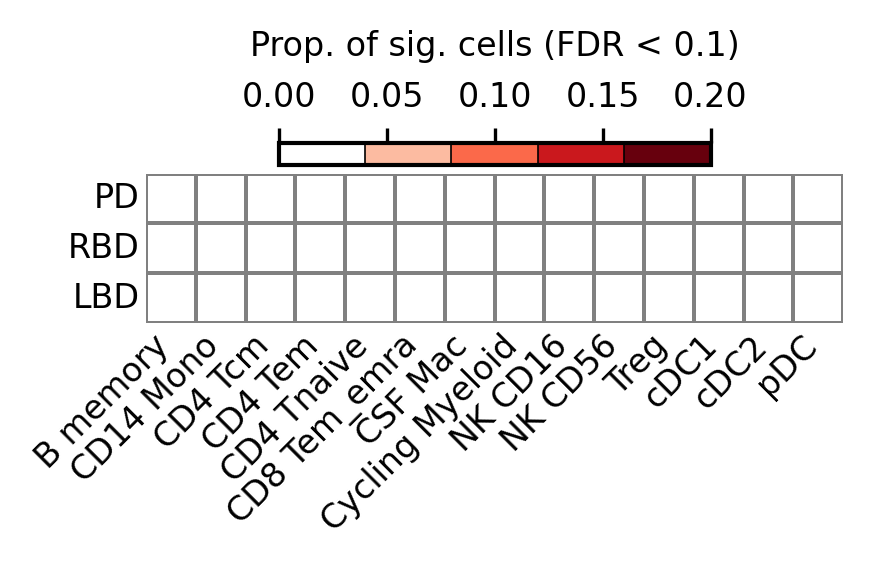

In [48]:
dict_df_stats = {
    trait: pd.read_csv(f"/home/yy693/pi_hafler/scDRS/output/241028_CSF_downstream_magic/{trait}.scdrs_group.cluster_L2", sep="\t", index_col=0)
    for trait in ["PD", "RBD", 'LBD']
}
for x in dict_df_stats.keys():
    dict_df_stats[x]['n_fdr_0.1'] = dict_df_stats[x]['n_fdr_0.2']
    dict_df_stats[x] = dict_df_stats[x][dict_df_stats[x]['n_cell'] > 500]
# dict_celltype_display_name = {
#     "pyramidal_CA1": "Pyramidal CA1",
#     "oligodendrocytes": "Oligodendrocyte",
#     "pyramidal_SS": "Pyramidal SS",
#     "interneurons": "Interneuron",
#     "endothelial-mural": "Endothelial",
#     "astrocytes_ependymal": "Astrocyte",
#     "microglia": "Microglia",
# }

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats={
        trait: df_stats #.rename(index=dict_celltype_display_name)
        for trait, df_stats in dict_df_stats.items()
    },
    plot_kws={
        "vmax": 0.2,
        "cb_fraction":0.12
    },
        assoc_fdr_threshold=0.1,
    hetero_fdr_threshold=0.1,
)
ax.grid(False)
plt.savefig(f'../scanpy/{version}/scDRS_CSF_magic_group.pdf', bbox_inches='tight')

In [ ]:
dict_df_stats['PD']['n_fdr_0.1'] = dict_df_stats['PD']['n_fdr_0.2']

In [12]:
dict_df_stats['PD']

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
group,,,,,,,,,
ASC,125.0,1000.0,0.343656,0.341895,0.092907,1.115659,0.0,0.0,0.0
B memory,1056.0,1000.0,0.062937,1.613976,0.000999,1.780344,0.0,0.0,0.0
B naive,196.0,1000.0,0.072927,1.474284,0.003996,1.714489,0.0,0.0,0.0
CD14 Mono,12200.0,1000.0,0.034965,1.844227,0.176823,0.893196,0.0,7.0,7.0
CD16 Mono,239.0,1000.0,0.416583,0.198951,0.031968,1.461533,0.0,0.0,0.0
CD4 Tcm,108083.0,1000.0,0.200799,0.808060,0.039960,1.537659,0.0,266.0,266.0
CD4 Tem,16895.0,1000.0,0.739261,-0.717438,0.219780,0.845276,0.0,3.0,3.0
CD4 Tnaive,14610.0,1000.0,0.225774,0.714210,0.037962,1.488951,0.0,52.0,52.0
CD8 Tem_emra,44823.0,1000.0,0.684316,-0.554982,0.103896,1.234786,0.0,10.0,10.0


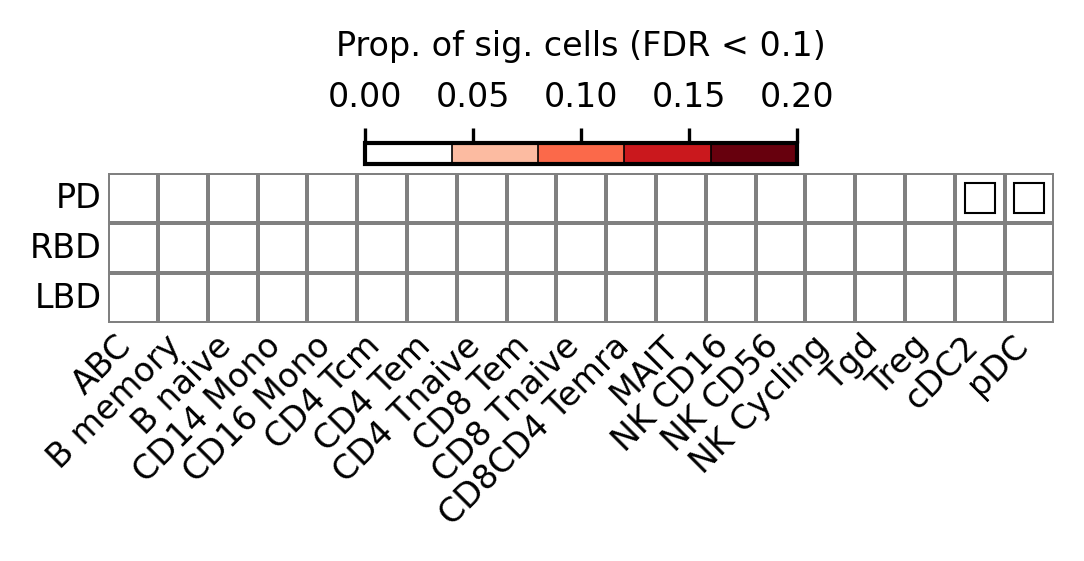

In [44]:
dict_df_stats = {
    trait: pd.read_csv(f"/home/yy693/pi_hafler/scDRS/output/241028_BLD_downstream/{trait}.scdrs_group.cluster_L2", sep="\t", index_col=0)
    for trait in [ "PD", 'RBD', 'LBD']
}
for x in dict_df_stats.keys():
    dict_df_stats[x]['n_fdr_0.1'] = dict_df_stats[x]['n_fdr_0.2']
    dict_df_stats[x] = dict_df_stats[x][dict_df_stats[x]['n_cell'] > 1000]
# dict_celltype_display_name = {
#     "pyramidal_CA1": "Pyramidal CA1",
#     "oligodendrocytes": "Oligodendrocyte",
#     "pyramidal_SS": "Pyramidal SS",
#     "interneurons": "Interneuron",
#     "endothelial-mural": "Endothelial",
#     "astrocytes_ependymal": "Astrocyte",
#     "microglia": "Microglia",
# }

fig, ax = scdrs.util.plot_group_stats(
    dict_df_stats={
        trait: df_stats #.rename(index=dict_celltype_display_name)
        for trait, df_stats in dict_df_stats.items()
    },
    plot_kws={
        "vmax": 0.2,
        "cb_fraction":0.12
    },
    assoc_fdr_threshold=0.1,
    hetero_fdr_threshold=0.1,
)
ax.grid(False)
plt.savefig(f'../scanpy/{version}/scDRS_BLD_group.pdf', bbox_inches='tight')

In [24]:
dict_df_stats['PD']

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
group,,,,,,,,,
ABC,2916.0,1000.0,0.059940,1.705979,0.891109,-1.165903,0.0,0.0,0.0
ASC,962.0,1000.0,0.476523,-0.051150,0.059940,1.632516,0.0,0.0,0.0
B memory,10664.0,1000.0,0.052947,1.717931,0.995005,-1.468684,0.0,0.0,0.0
B naive,27797.0,1000.0,0.028971,2.072968,0.213786,0.355900,0.0,0.0,0.0
CD14 Mono,84453.0,1000.0,0.046953,1.723263,0.308691,0.063869,0.0,0.0,0.0
CD16 Mono,17837.0,1000.0,0.315684,0.449344,0.032967,2.130169,0.0,0.0,0.0
CD16 Mono C1,803.0,1000.0,0.018981,2.777937,0.976024,-1.954119,0.0,0.0,0.0
CD4 Tcm,64326.0,1000.0,0.970030,-1.788621,0.033966,2.086927,0.0,0.0,0.0
CD4 Tem,51351.0,1000.0,0.989011,-2.121160,0.051948,1.322118,0.0,0.0,0.0
